# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | kindu
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | kovin
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | banjarmasin
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | valparaiso
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | kidal
Processing Record 12 of Set 1 | kokopo
Processing Record 13 of Set 1 | zag
Processing Record 14 of Set 1 | taroa
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | palu
Processing Record 21 of Set 1 | las vegas
Processing Record 22 of Set 1 | tiksi
Processing Record 23 

Processing Record 39 of Set 4 | camocim
Processing Record 40 of Set 4 | izobil'nyy
Processing Record 41 of Set 4 | ca mau
Processing Record 42 of Set 4 | yaren
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | tazacorte
Processing Record 45 of Set 4 | lubumbashi
Processing Record 46 of Set 4 | nar'yan-mar
Processing Record 47 of Set 4 | bodo
Processing Record 48 of Set 4 | kudahuvadhoo
Processing Record 49 of Set 4 | pisco
Processing Record 0 of Set 5 | saint-francois
Processing Record 1 of Set 5 | zaozersk
Processing Record 2 of Set 5 | bolobo
Processing Record 3 of Set 5 | yelizovo
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | tutoia
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | xuanzhou
Processing Record 8 of Set 5 | estevan
Processing Record 9 of Set 5 | klyuchi
Processing Record 10 of Set 5 | nanpiao
Processing Record 11 of Set 5 | kuraymah
Processing Record 12 of Set 5 | stenungsund
Processing Record 13 of Set 5 

Processing Record 31 of Set 8 | puerto aysen
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | zhezqazghan
Processing Record 34 of Set 8 | benjamin constant
Processing Record 35 of Set 8 | mhamid
Processing Record 36 of Set 8 | oranjemund
Processing Record 37 of Set 8 | pangody
Processing Record 38 of Set 8 | lu-uk
Processing Record 39 of Set 8 | akranes
Processing Record 40 of Set 8 | karamay
City not found. Skipping...
Processing Record 41 of Set 8 | palikir - national government center
Processing Record 42 of Set 8 | batticaloa
Processing Record 43 of Set 8 | serik
Processing Record 44 of Set 8 | sarlat-la-caneda
Processing Record 45 of Set 8 | marudi
City not found. Skipping...
Processing Record 46 of Set 8 | velyka pysarivka
Processing Record 47 of Set 8 | thi xa phu my
City not found. Skipping...
Processing Record 48 of Set 8 | afaahiti
Processing Record 49 of Set 8 | vila velha
Processing Record 0 of Set 9 | luena
Processing Record 1 of Set 9 | exu
Process

Processing Record 19 of Set 12 | acajutla
Processing Record 20 of Set 12 | recea
Processing Record 21 of Set 12 | energetik
Processing Record 22 of Set 12 | nago
Processing Record 23 of Set 12 | san miguel de tucuman
Processing Record 24 of Set 12 | nuuk
Processing Record 25 of Set 12 | nova sintra
Processing Record 26 of Set 12 | vadlamuru
Processing Record 27 of Set 12 | gladewater
Processing Record 28 of Set 12 | kigorobya
Processing Record 29 of Set 12 | souillac
Processing Record 30 of Set 12 | mocorito
Processing Record 31 of Set 12 | collie
Processing Record 32 of Set 12 | basco
Processing Record 33 of Set 12 | luderitz
Processing Record 34 of Set 12 | solwezi
Processing Record 35 of Set 12 | kourou
Processing Record 36 of Set 12 | igarka
Processing Record 37 of Set 12 | vila do maio
Processing Record 38 of Set 12 | bassila
Processing Record 39 of Set 12 | koungheul
Processing Record 40 of Set 12 | sotnikovskoye
Processing Record 41 of Set 12 | muslyumovo
Processing Record 42 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,69,100,3.60,CA,1694961823
1,kindu,-2.9500,25.9500,29.82,51,100,2.43,CD,1694961823
2,flying fish cove,-10.4217,105.6791,23.82,83,40,5.14,CX,1694961586
3,grytviken,-54.2811,-36.5092,-1.03,97,100,5.07,GS,1694961823
4,kovin,44.7475,20.9761,26.61,47,3,7.94,RS,1694961824


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,69,100,3.60,CA,1694961823
1,kindu,-2.9500,25.9500,29.82,51,100,2.43,CD,1694961823
2,flying fish cove,-10.4217,105.6791,23.82,83,40,5.14,CX,1694961586
3,grytviken,-54.2811,-36.5092,-1.03,97,100,5.07,GS,1694961823
4,kovin,44.7475,20.9761,26.61,47,3,7.94,RS,1694961824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

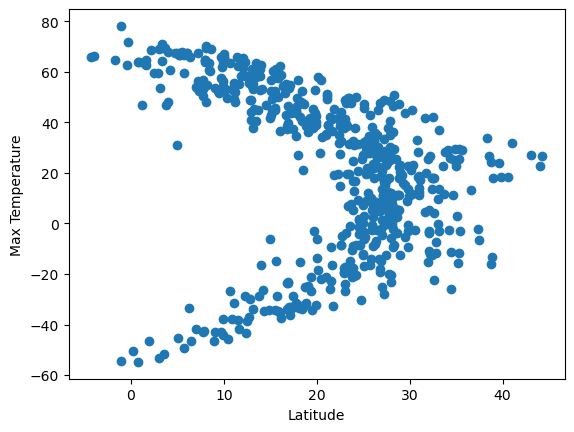

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

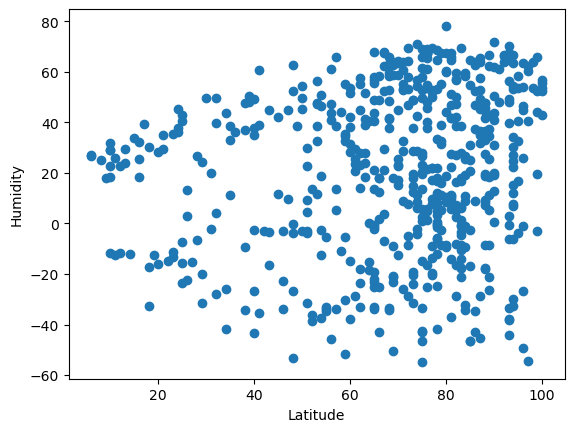

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

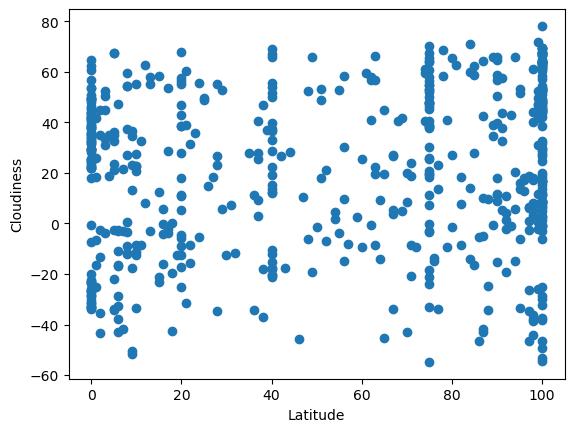

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

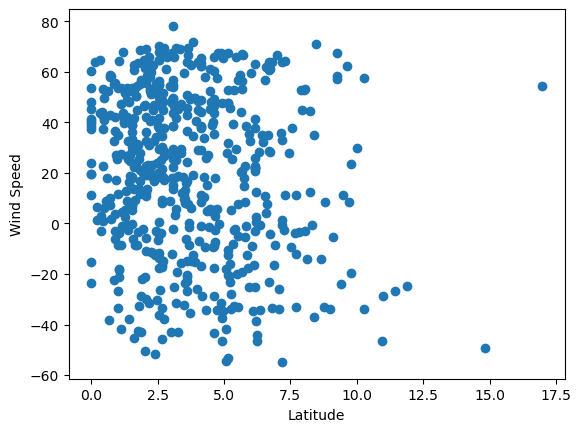

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,69,100,3.60,CA,1694961823
4,kovin,44.7475,20.9761,26.61,47,3,7.94,RS,1694961824
10,kidal,18.4411,1.4078,39.83,16,27,3.45,ML,1694961824
12,zag,46.9441,99.1650,3.76,72,38,2.35,MN,1694961825
13,taroa,8.7058,171.2275,26.35,88,100,8.79,MH,1694961825


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kindu,-2.9500,25.9500,29.82,51,100,2.43,CD,1694961823
2,flying fish cove,-10.4217,105.6791,23.82,83,40,5.14,CX,1694961586
3,grytviken,-54.2811,-36.5092,-1.03,97,100,5.07,GS,1694961823
5,adamstown,-25.0660,-130.1015,18.77,66,100,5.96,PN,1694961824
6,banjarmasin,-3.3244,114.5910,25.08,83,75,1.77,ID,1694961824


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7927346713560615


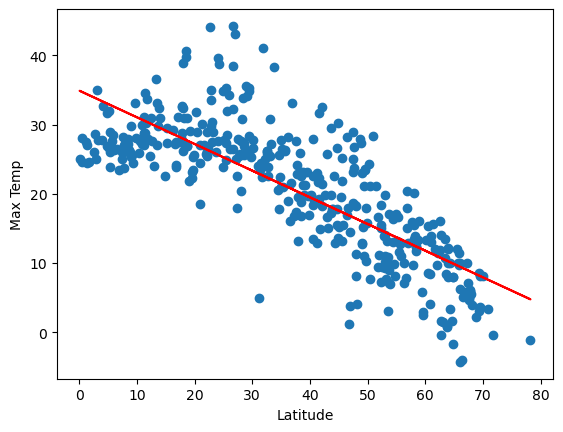

In [15]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.8167464338819401


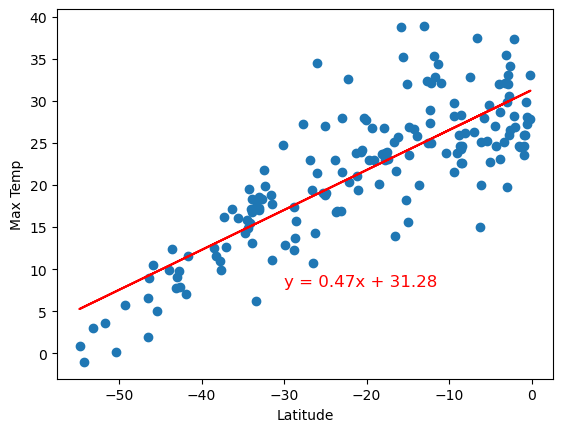

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** Relationship between Temperature and Latitude:

*There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of  -0.7927346713560615 on Northern Hemisphere.
*There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.8167464338819401 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12763825322240552


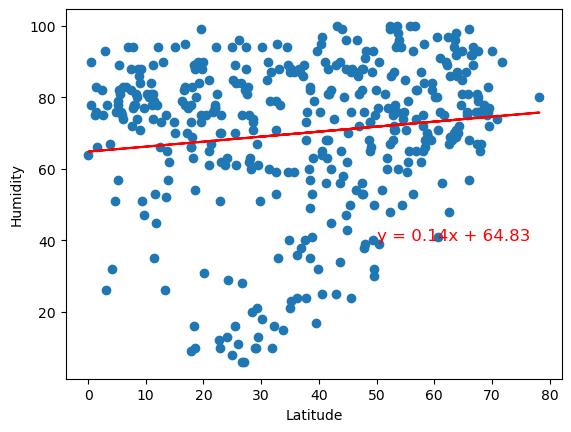

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: -0.06093796037885096


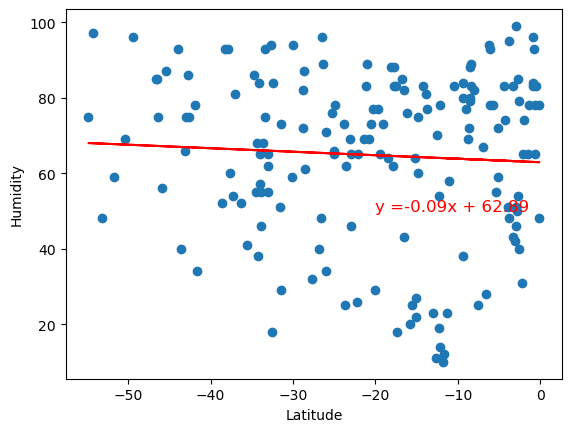

In [18]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:*Relationship between Humidity and Latitude:

*There is a relatively week +ve correlation between humidity and latitude with a correlation coefficient of 0.12763825322240552 on Northern Hemisphere.
*There is a relatively very week -ve correlation correlation between humidity and latitude with a correlation coefficient of -0.06093796037885096 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04723035580247251


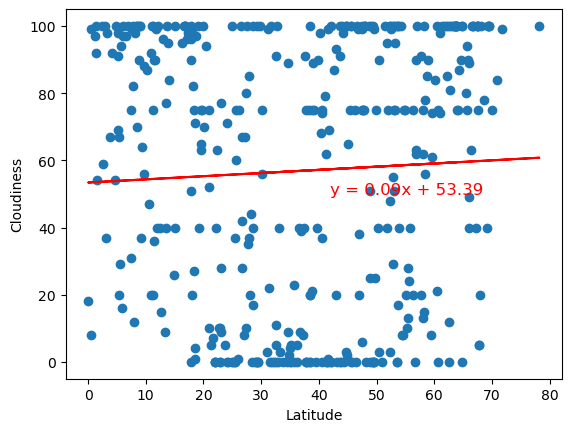

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.05835339995506403


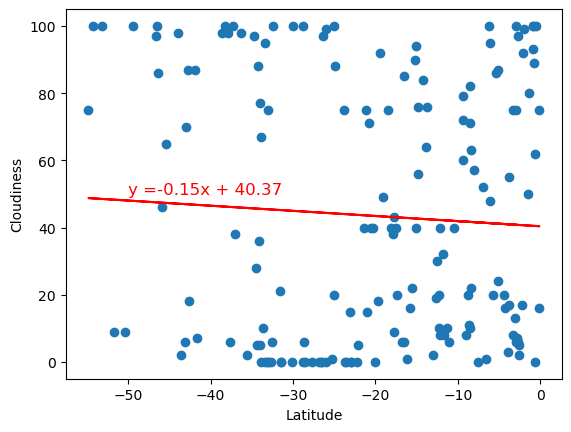

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:* Relationship between Cloudiness and Latitude:
*There is a week +ve correlation between cloudiness and latitude with a correlation coefficient of 0.04723035580247251 on Northeren Hamisphere.
*There is a week -ve correlation between cloudiness and latitude with a correlation coefficient of -0.05835339995506403 on Southeren  Hamisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05603648850850009


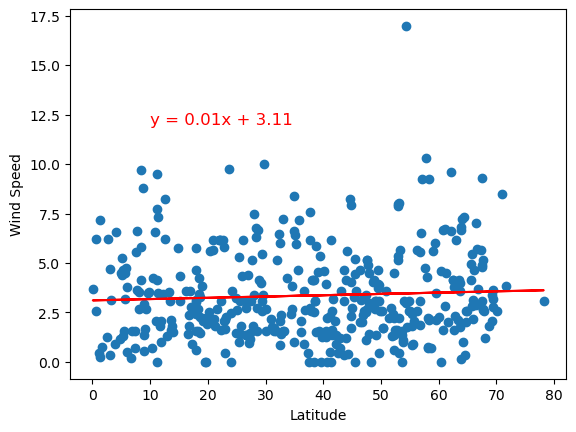

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.1211265868245221


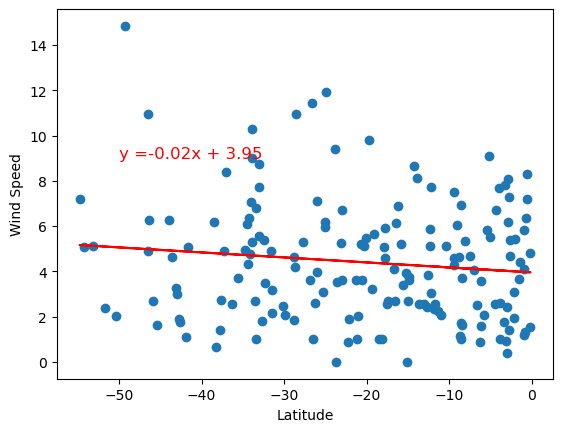

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:* Relationship Between Wind Speed And Latitude:
*There is almost week +ve corrilation between wind speed and latitude with a correlation coefficientof 0.05603648850850009 on Northern Hemisphere.
*There is a week -ve  correlation between wind speed and latitude with a correlation coefficient of -0.1211265868245221 on Southern Hemisphere.   